# ARM Open-Science Basics with CRG

<table>
    <tr>
        <td>
            <img src="https://www.arm.gov/wp-content/uploads/54251180546_1125c8161e_c-768x577.jpg" style="height: 300px;" alt="CRG Campaign"></img>
        </td>
        <td>
            <h1>Atmospheric Radiation Measurement user facility (ARM)</h1>
            <h1>Coast-Urban-Rural Atmospheric Gradient Experiment(CRG)</h1>
            Notebook showing how to download and visualize data from ARM and MSDLive </br>
            Corresponding Author: Adam Theisen (atheisen@anl.gov)
        </td>
    </tr>
</table>

## Overview
The first ARM Mobile Facility (AMF1) is deployed to 3 sites around the Baltimore, MD region beginning December 1, 2024.  As the name implies, the 3 sites cover coastal (supplemental site S3), urban (main site M1), and rural (supplemental site S2).  This tutorial will help users download and visualie both ARM and the BSEC doppler lidar datasets.

## Prerequisites
This notebook will rely heavily on Python, [Atmospheric data Community Toolkit (ACT)](https://github.com/ARM-DOE/ACT), and the [MSDLive Command Line Interface](https://msdlive.org/sb/cli-help).  Don't worry if you don't have experience with either, this notebook will walk you though what you need to know.  

You will also need an account and token to download data using the ARM Live webservice.  Navigate to the [webservice information page](https://adc.arm.gov/armlive/) and log in to get your token.  Your account username will be your ARM username.

You will also need an MSDLive account that you can create through their [website](https://msdlive.org/).  You will also need to install the command line interface using the instructions under "Installing the CLI" [here](https://msdlive.org/sb/cli-help).

| Concepts | Importance | Notes |
| --- | --- | --- |
| [ACT](https://github.com/ARM-DOE/ACT) | Helpful | |

- **Time to learn**: 15 Minutes
- **System requirements**:
    - Python 3.11 or latest
    - ACT v2.0.0 or latest
    - Py-ART 2.02 (Bug fixes submitted as PR)
    - numpy
    - xarray
    - matplotlib

---

## ARM and BSEC Doppler Lidar Data
The doppler lidar (DL) is an active remote-sensing instrument that provides range- and time-resolved measurements of radial velocity abd attenuated aerosol backscatter.  More information can be found on ARM's [DL instrument page](https://arm.gov/capabilities/instruments/dl).
### Import Libraries

In [1]:
# Import Libraries
import os
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import act

/opt/anaconda3/envs/act_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


### BSEC Data
The BSEC data can be downloaded using the msdlive command line tool.  Please see Prerequisites for more details.

In [2]:
# Log in to msdlive
! msdlive login --email YourEmail --password YourPassword

Authenticating...
Login successful!


In [3]:
# Let's create a directory for the bsec data
dir_path = './bsec_data/'
os.makedirs(dir_path, exist_ok=True)

### IMPORTANT STEP!
There is a lot of data in this directory so we're just going to download a subset.  In order to do that, we need to create a yaml file with the following information.  The easiest way is to open a terminal inthe Jupyter Launcher (+ symbol at top of page), click on "Terminal" and then open a file using

```
vi filter.yml
```

then you can copy and paste the following:

```
# This is a basic example of a filter-file.yaml

# Provide a list of patterns to exclude.  
exclude:
  - '*'   # Exclude all files

# Provide a list of patterns that are exceptions to the 
# above exclude rules.  
except:
  - '*20250110*.nc'  # Except, include all files that end with .txt
```

### Download BSEC Data

In [4]:
# Let's create a directory for the bsec doppler lidar data
dir_path = './bsec_data/dl/'
os.makedirs(dir_path, exist_ok=True)

# And download the data
! msdlive download --dataset-id m8mav-s5r60 --output-dir='./bsec_data/dl/' --quiet --filter-file './filter.yml'

⠏ Downloading...


### Read data in using xarray
This is a great example of using the tools that work for what you need in Python.  Xarray works just fine to open up these files and get them into a dataset that can be used by ACT.

In [30]:
# Let's find the vertical stare data and read it in with xarray
# Anything xarray dataset will work with ACT
files = glob.glob(dir_path + '01_Vertical_Stare_Scans/data_stare/2024/*nc')
ds_bsec_dl = xr.open_mfdataset(files)

### Download ARM DL Data
As a reminder, you will need a username and token.  See prerequisites for details on how to get one from ARM.

In [6]:
# And download the ARM data
# Set the datastream and start/enddates
datastream = 'crgdlfptS2.b1'
startdate = '2024-12-24'
enddate = '2024-12-24T23:59:59'

# Set your username and token here!
username = 'YourARMUsername'
token = 'YourARMToken'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_dl = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] crgdlfptS2.b1.20241224.000018.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.010019.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.020018.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.030017.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.040018.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.050019.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.060019.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.070018.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.080018.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.090018.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.100018.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.110018.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.120017.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.130018.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.140017.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.150019.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.160018.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.170017.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.180018.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.190019.cdf
[DOWNLOADING] crgdlfptS2.b1.20241224.200

### Read ARM Data Using ACT

In [31]:
ds_arm_dl = act.io.read_arm_netcdf(result_dl)

### Resample Data to 30-Second Resolution
This is to help with future plotting and work with the data

In [32]:
ds_arm_dl = ds_arm_dl.resample(time='30s').nearest()
ds_bsec_dl = ds_bsec_dl.resample(time='30s').nearest()

ds_arm_dl = ds_arm_dl.where(ds_arm_dl.range > 45.)
ds_bsec_dl = ds_bsec_dl.where(ds_bsec_dl.range > 45.)

### Plot ARM and BSEC Data Together Using ACT

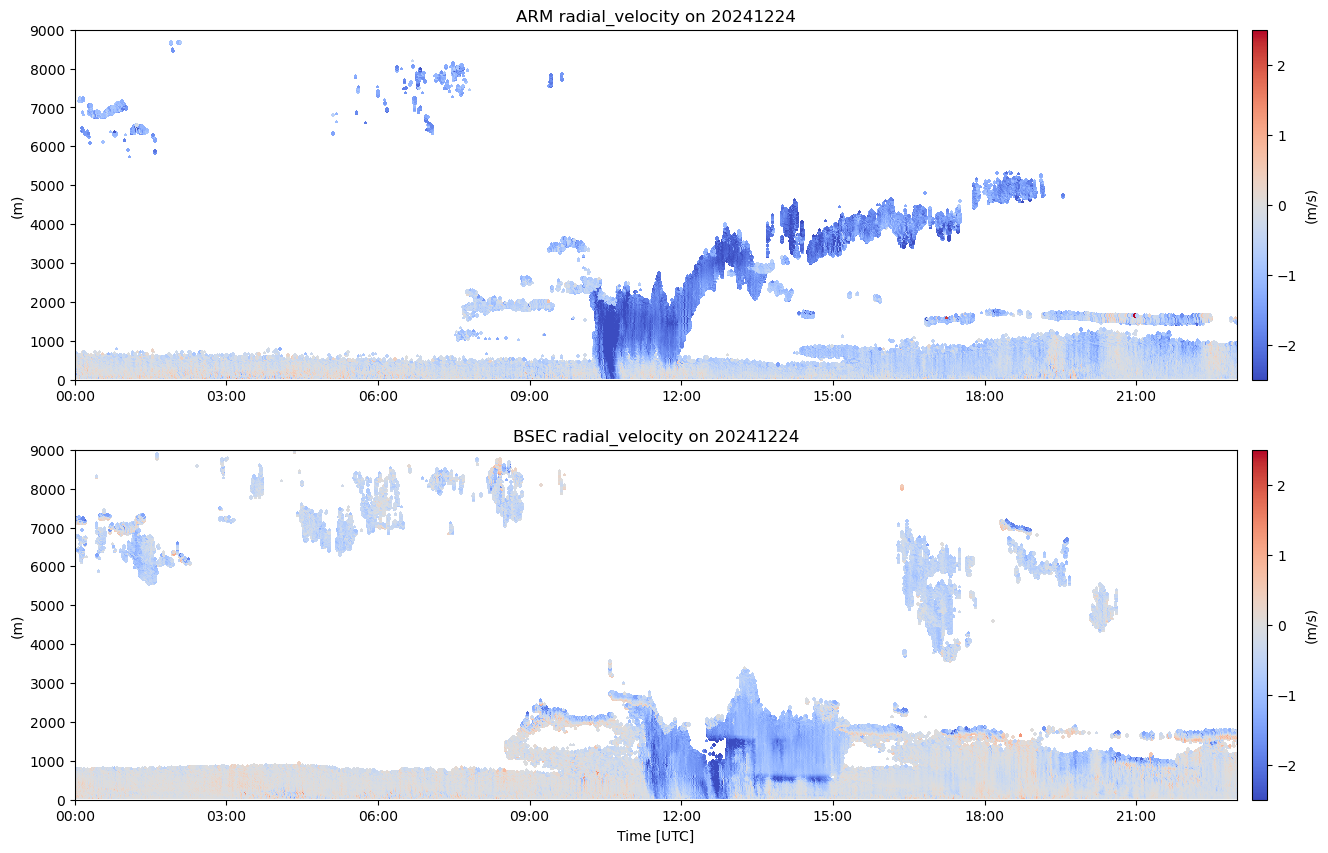

In [35]:
# First, let's subset the data to remove some of the noise
ds_arm_dl = ds_arm_dl.where(ds_arm_dl['intensity'] > 1.02)
ds_bsec_dl = ds_bsec_dl.where(ds_bsec_dl['intensity'] > 1.02)

display = act.plotting.TimeSeriesDisplay({'ARM': ds_arm_dl, 'BSEC': ds_bsec_dl}, figsize=(15,10), subplot_shape=(2,))
display.plot('radial_velocity', dsname='ARM', subplot_index=(0,), cmap='coolwarm', vmin=-2.5, vmax=2.5)
display.plot('radial_velocity', dsname='BSEC', subplot_index=(1,), cmap='coolwarm', vmin=-2.5, vmax=2.5)
display.set_yrng([0, 9000], subplot_index=(0,))
display.set_yrng([0, 9000], subplot_index=(1,))

### Plot up Mean Profiles of Radial Velocity Using Matplotlib
The great part with all these tools is the interoperability between them.  If one package does not have what you need, there is sure to be another.

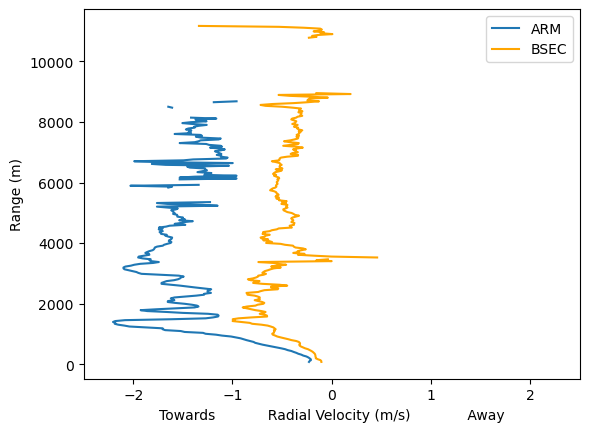

In [37]:
# Let's plot some time-height average profiles of the data
fig, ax = plt.subplots()
ax.plot(ds_arm_dl.radial_velocity.mean(axis=0), ds_arm_dl.range, label='ARM')
ax.plot(ds_bsec_dl.radial_velocity.mean(axis=0), ds_bsec_dl.range, color='orange', label='BSEC')
ax.set_xlabel('Towards            Radial Velocity (m/s)             Away')
ax.set_ylabel('Range (m)')
ax.set_xlim([-2.5, 2.5])

# If you want to just look at the boundary lay you can update the y-limits
#ax.set_ylim([0, 1000.])

plt.legend()

## Summary
This notebook should have shown you the basics of downloading and visualizing doppler lidar data from BSEC and ARM and ways of using different python libraries in conjunction with ACT.  Additional notebooks will be made available in the future for other instrument comparisons.

### Data Used in this Notebook
Newsom, R., Shi, Y., & Krishnamurthy, R. Doppler Lidar (DLFPT), 2025-01-10 to 2025-01-10, ARM Mobile Facility (CRG), Baltimore, MD; Supplemental Facility 2 in rural setting (S2). Atmospheric Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1025185

Prince, N. E., Miller, D. O., Ahlswede, B., Li, X., Collins, S. P., Haupt, B., Miles, N. L., Richardson, S. J., & Davis, K. J. (2025). Baltimore Social-Environmental Collaborative (BSEC) Doppler Lidar & Derived Products (v2.0.0) [Data set]. MSD-LIVE Data Repository. https://doi.org/10.57931/2568764